<a href="https://colab.research.google.com/github/SohamSinghal/PythonProjects/blob/master/Male_weight%2Cheight_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pld

In [ ]:
data = pd.read_csv('weight-height.csv')

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
encode = ColumnTransformer([('encode',OneHotEncoder(),[0])],remainder = 'passthrough')
encode.fit(x)
x = encode.transform(x)

In [ ]:
print(x)

[[0.0 1.0 241.8935632]
 [0.0 1.0 162.3104725]
 [0.0 1.0 212.74085559999997]
 ...
 [1.0 0.0 128.4753188]
 [1.0 0.0 163.85246130000002]
 [1.0 0.0 113.6491027]]


In [ ]:
print(y)

[73.84701702 68.78190405 74.11010539 ... 63.86799221 69.03424313
 61.94424588]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)


In [ ]:
x_train

array([[1.0, 0.0, 143.37307719999998],
       [1.0, 0.0, 123.41225390000001],
       [1.0, 0.0, 118.13672700000001],
       ...,
       [0.0, 1.0, 156.2748014],
       [0.0, 1.0, 193.4417441],
       [0.0, 1.0, 174.5848799]], dtype=object)

In [ ]:
np.shape(x_train)

(9000, 3)

In [ ]:
y_train

array([65.28601781, 64.16393928, 60.64026619, ..., 65.34858963,
       71.6753934 , 65.78872979])

In [ ]:
np.shape(y_train)

(9000,)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
gender = input("M/F:")
if gender.upper == "M":
  array = np.array([1.0,0.0])
  height = float(input("Enter height in cms :"))
elif gender.upper == "F":
  array = np.array([0.0,1.0])
  height = float(input("Enter height in cms :"))   
else:
  print('Enter an actual gender') 

M/F:r


In [ ]:
array = np.append(array,np.array(height)).reshape(1,3)
print(array,np.shape(array))

In [ ]:
predict = lr_model.predict(x_test)

In [ ]:
predict

array([63.69872978, 65.65537004, 63.68047159, 67.06308875, 62.70844816,
       70.64118912, 66.52337514, 67.56103177, 61.79799269, 61.46362493,
       62.07920747, 64.02918606, 64.17650032, 60.07339904, 65.62557068,
       63.4366624 , 66.34894584, 66.65028764, 69.69634516, 71.28325   ,
       66.43865153, 66.65556161, 68.7071728 , 67.01079647, 63.98297042,
       69.92097473, 66.79735195, 62.45968766, 63.96472801, 61.61435188,
       64.36340751, 61.29283044, 62.71811908, 70.64122761, 67.48086472,
       74.05833497, 68.3751356 , 69.14149907, 63.80691836, 70.93725888,
       67.51423956, 70.71259873, 67.73345411, 65.53871602, 65.6997284 ,
       59.85104928, 65.63245075, 63.88708263, 70.93165686, 61.40849487,
       70.38596367, 63.62289423, 71.36067142, 67.71100464, 71.51822819,
       70.00533478, 71.16180542, 70.2176956 , 63.25014032, 65.51579083,
       70.97297511, 71.04112247, 62.4597871 , 61.04488685, 64.80989866,
       65.96109006, 69.56727381, 70.62315558, 60.43877437, 66.05

Text(0, 0.5, 'Weight')

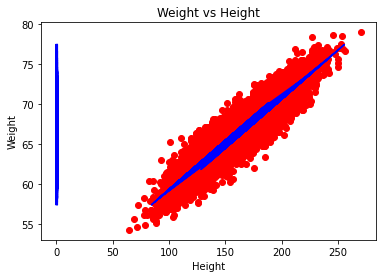

In [ ]:
pld.scatter(x_train[:,-1],y_train,color = 'red')
pld.plot(x_test,predict,color = 'blue')
pld.title('Weight vs Height')
pld.xlabel('Height')
pld.ylabel('Weight')